In [2]:
#Import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [63]:
stock = pd.read_csv("C:/Users/suresh/Desktop/PYTHON ML DATA SCIENCE/Stock Prediction/Stock Data/BPCL.csv")

In [64]:
stock.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BPCL,EQ,381.20,405.00,407.00,393.05,397.75,399.25,399.32,8720,3.482029e+11,NaN,NaN,NaN
1,2000-01-04,BPCL,EQ,399.25,397.75,397.75,367.40,377.45,370.50,375.71,22820,8.573699e+11,NaN,NaN,NaN
2,2000-01-05,BPCL,EQ,370.50,350.00,385.00,350.00,360.10,359.95,359.96,152538,5.490785e+12,NaN,NaN,NaN
3,2000-01-06,BPCL,EQ,359.95,362.00,384.00,362.00,381.65,380.30,380.10,59554,2.263623e+12,NaN,NaN,NaN
4,2000-01-07,BPCL,EQ,380.30,369.00,390.00,366.00,381.50,379.85,378.33,43187,1.633890e+12,NaN,NaN,NaN


In [65]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4797 non-null   float64
 14  %Deliverble         4797 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [66]:
stock.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2456.000000,4.797000e+03,4797.000000
mean,444.369977,445.014220,452.935686,436.630013,444.384065,444.377629,444.802256,2.093650e+06,9.323829e+13,55725.562704,8.673432e+05,0.443450
std,184.340340,184.491153,186.373754,182.706581,184.352843,184.338560,184.537444,4.462703e+06,1.927900e+14,47656.113461,2.283629e+06,0.150737
min,110.150000,113.900000,117.500000,106.250000,110.000000,110.150000,114.130000,2.297000e+03,6.755889e+10,427.000000,2.903000e+03,0.050500
25%,333.837500,334.000000,341.000000,326.387500,334.012500,333.837500,333.715000,4.136565e+05,1.647654e+13,24509.750000,2.305310e+05,0.333200
50%,393.400000,394.075000,400.825000,385.350000,393.100000,393.550000,392.680000,8.820490e+05,3.808395e+13,45158.500000,4.431750e+05,0.443800
75%,555.125000,555.750000,564.975000,544.987500,554.937500,555.125000,554.590000,2.040695e+06,1.140152e+14,71881.750000,9.883100e+05,0.547000
max,1133.300000,1132.200000,1156.000000,1120.100000,1132.100000,1133.300000,1137.040000,1.997910e+08,8.810053e+15,511790.000000,1.355721e+08,1.000000


In [67]:
# Ensure we are working with a copy of the DataFrame to avoid the SettingWithCopyWarning
stock = stock.copy()

In [68]:
# Calculate HL_Perc and CO_Perc
stock.loc[:, 'HL_Perc'] = (stock['High'] - stock['Low']) / stock['Low'] * 100
stock.loc[:, 'CO_Perc'] = (stock['Close'] - stock['Open']) / stock['Open'] * 100

In [69]:
dates = np.array(stock["Date"])
dates_check = dates[-30:]
dates = dates[:-30]

In [70]:
stock.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'HL_Perc', 'CO_Perc'],
      dtype='object')

In [71]:
stock = stock[["HL_Perc", "CO_Perc", "Close", "Volume"]]

In [72]:
#Define the label column
stock["PriceNextMonth"] = stock["Close"].shift(-30)

In [73]:
stock.tail()

,HL_Perc,CO_Perc,Close,Volume,PriceNextMonth
5301,2.586517,-1.666667,418.90,6444098,NaN
5302,1.572440,0.682635,420.35,5408165,NaN
5303,2.277657,-1.066351,417.50,9902533,NaN
5304,1.438849,-0.580569,419.55,6632804,NaN
5305,5.510672,1.029940,421.80,16851470,NaN


In [74]:
#Make fetaure and label arrays
X = np.array(stock.drop(["PriceNextMonth"], 1))
X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
stock.dropna(inplace = True)
y = np.array(stock["PriceNextMonth"])

C:\Users\suresh\AppData\Local\Temp\ipykernel_17924\459189850.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(stock.drop(["PriceNextMonth"], 1))


In [75]:
#Divide the data set into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [76]:
#Define the prediction model
model = RandomForestRegressor()

In [77]:
#Fit the model using training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [78]:
#Calculate the confidence value by applying the model to testing data
conf = model.score(X_test, y_test)
print(conf)

0.9015384747226772


In [79]:
#Fit the model again using the whole data set
model.fit(X,y)

RandomForestRegressor()

In [80]:
predictions = model.predict(X_Check)

In [81]:
#Make the final DataFrame containing Dates, ClosePrices, and Forecast values
actual = pd.DataFrame(dates, columns = ["Date"])
actual["ClosePrice"] = stock["Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var)  #This is the final DataFrame

Text(0, 0.5, 'Price')

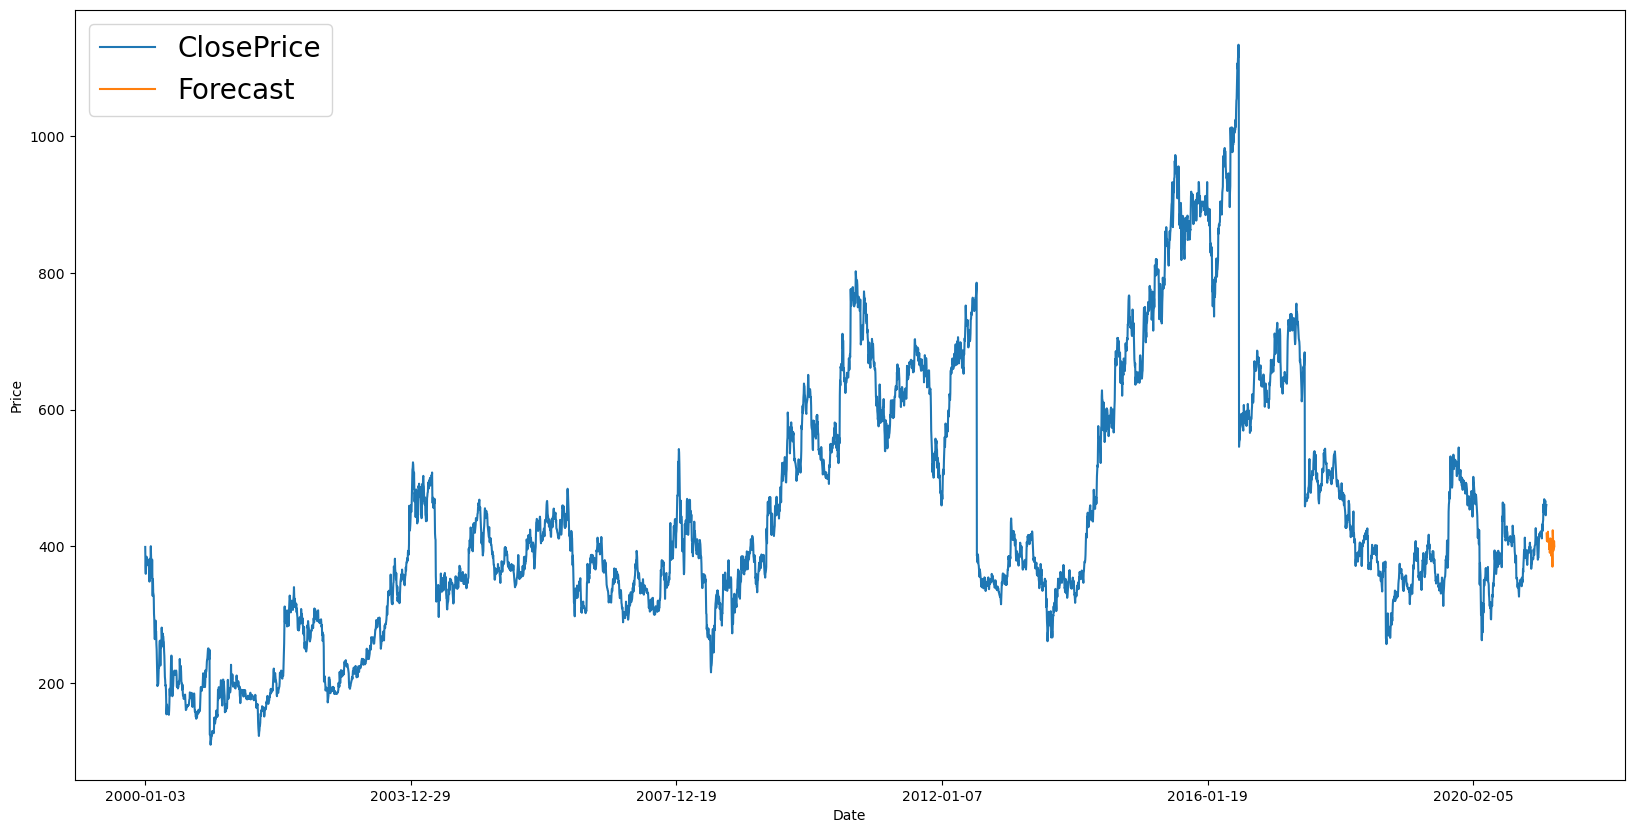

In [82]:
#Plot the final results
result.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')